Loaded timing log: timings_antislop_20250512_153552.csv


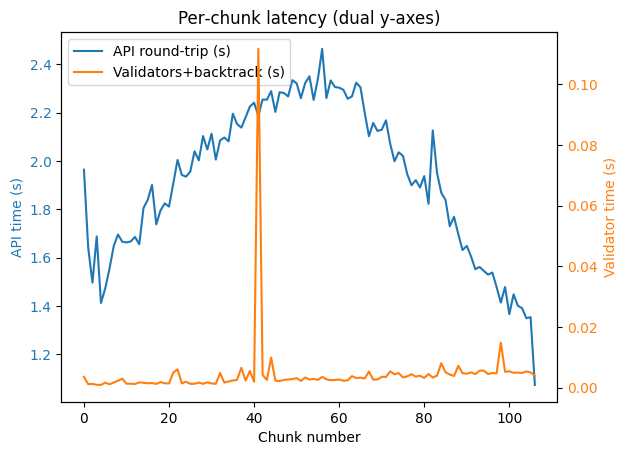

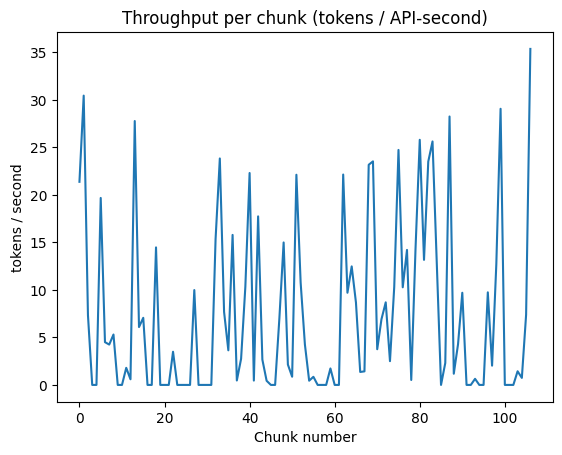

In [24]:
import glob, os, pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Locate latest timing CSV
# ------------------------------------------------------------------
csv_files = glob.glob("timings_antislop_*.csv")
if not csv_files:
    raise FileNotFoundError("No timings_antislop_*.csv files found in the current directory.")
latest_csv = max(csv_files, key=os.path.getmtime)
print(f"Loaded timing log: {latest_csv}")

df = pd.read_csv(latest_csv)

# ------------------------------------------------------------------
# 2. Dual‑axis latency plot with distinct colours
# ------------------------------------------------------------------
fig1, ax_left = plt.subplots()

color_api = "tab:blue"
color_val = "tab:orange"

ax_left.plot(df["chunk"], df["api_sec"], label="API round‑trip (s)", color=color_api)
ax_left.set_xlabel("Chunk number")
ax_left.set_ylabel("API time (s)", color=color_api)
ax_left.tick_params(axis='y', labelcolor=color_api)

ax_right = ax_left.twinx()
ax_right.plot(df["chunk"], df["validators_sec"], label="Validators+backtrack (s)", color=color_val)
ax_right.set_ylabel("Validator time (s)", color=color_val)
ax_right.tick_params(axis='y', labelcolor=color_val)

plt.title("Per‑chunk latency (dual y‑axes)")

# combined legend
lines_l, labels_l = ax_left.get_legend_handles_labels()
lines_r, labels_r = ax_right.get_legend_handles_labels()
ax_left.legend(lines_l + lines_r, labels_l + labels_r, loc="upper left")

plt.show()

# ------------------------------------------------------------------
# 3. Throughput curve
# ------------------------------------------------------------------
tokens_this_chunk = df["ctx_len"].diff().fillna(df["ctx_len"])
throughput = tokens_this_chunk / df["api_sec"]  # tok/s

plt.figure()
plt.plot(df["chunk"], throughput)
plt.xlabel("Chunk number")
plt.ylabel("tokens / second")
plt.title("Throughput per chunk (tokens / API‑second)")
plt.show()
